In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ds=pd.read_csv('customer_churn.csv')
df=pd.DataFrame(data=ds)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

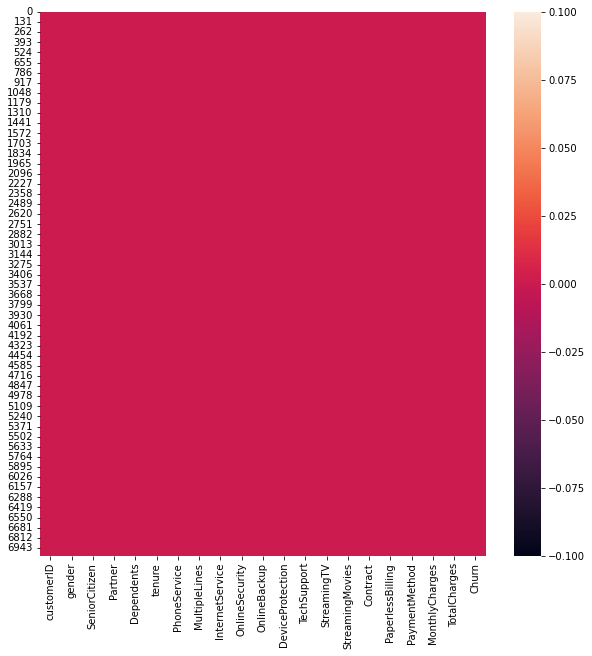

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(ds.isnull())
plt.show()

There is no null values in the dataset

In [6]:
df.dtypes.sort_values(ascending=True)

SeniorCitizen         int64
tenure                int64
MonthlyCharges      float64
customerID           object
PaymentMethod        object
PaperlessBilling     object
Contract             object
StreamingMovies      object
StreamingTV          object
TechSupport          object
DeviceProtection     object
OnlineBackup         object
OnlineSecurity       object
InternetService      object
MultipleLines        object
PhoneService         object
Dependents           object
Partner              object
gender               object
TotalCharges         object
Churn                object
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

In [8]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
        

In [9]:
df.dtypes.sort_values(ascending=True)

customerID            int64
PaymentMethod         int64
PaperlessBilling      int64
Contract              int64
StreamingMovies       int64
StreamingTV           int64
TechSupport           int64
DeviceProtection      int64
TotalCharges          int64
OnlineBackup          int64
InternetService       int64
MultipleLines         int64
PhoneService          int64
tenure                int64
Dependents            int64
Partner               int64
SeniorCitizen         int64
gender                int64
OnlineSecurity        int64
Churn                 int64
MonthlyCharges      float64
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerID,7043.0,3521.000000,2033.283305,0.00,1760.5,3521.00,5281.50,7042.00
gender,7043.0,0.504756,0.500013,0.00,0.0,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.0,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.0,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.0,1.00,1.00,1.00
MultipleLines,7043.0,0.940508,0.948554,0.00,0.0,1.00,2.00,2.00
InternetService,7043.0,0.872923,0.737796,0.00,0.0,1.00,1.00,2.00
OnlineSecurity,7043.0,0.790004,0.859848,0.00,0.0,1.00,2.00,2.00


Key Observations:
1. The mean value of Tenure is greater than its 50th percentile per the above indicating skewness
2. Monthly charges has a mean value lower than than the 50th percentile also indicating skewness
3. Both MOnthly charges and Tenure has a mild difference between the 75th percentile and the maximum value indicating the likely presence of outliers
    

In [11]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


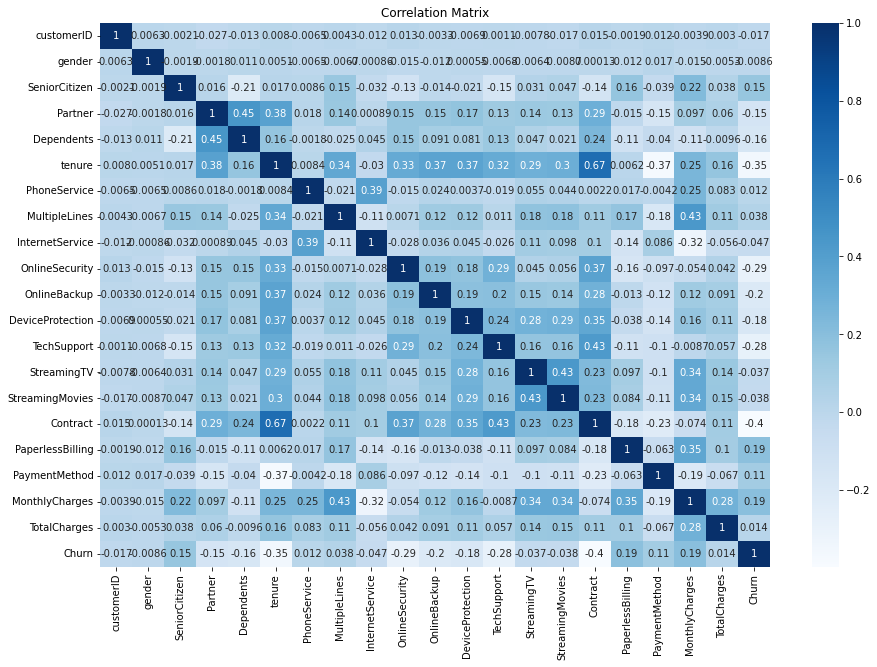

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.title('Correlation Matrix')
plt.savefig('Correlation Matrix.jpg')
plt.show()

Key Observations:
1. Tenure and Contract has the highest positive correlation of 67% per the above.
2. Gender and Contract shows an almost no correlation 
3. The highest inverse correlation in the data is 37%, which is between Tenure and Payment method
    

In [13]:
df.corr()['Churn'].sort_values(ascending=True)

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
customerID         -0.017447
gender             -0.008612
PhoneService        0.011942
TotalCharges        0.014479
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

Key Observations:
1. The dependent variable (Churn) almost insignificantly with Gender
2. The highest positive correlation per the data is 19.3% between Churn and Monthly charge
3. The highest negative correlation per the data is 39.6% is between Churn and Contract.
    
    

In [264]:
#Checking for inbalance

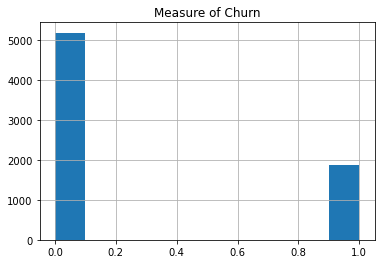

0    5174
1    1869
Name: Churn, dtype: int64

In [265]:
df['Churn'].hist()
plt.title('Measure of Churn')
plt.show()

df['Churn'].value_counts()

In [266]:
le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [267]:
import sklearn
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [268]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [269]:
trainx.value_counts()

gender     SeniorCitizen  Partner    Dependents  tenure     PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
-1.009559  -0.439916      -0.966622  -0.654012   -1.644343  0.327438      -1.015015       1.398323         0.574655        0.333547      0.337655          0.559883     0.169907     0.155116        -0.888524  -1.205113          1.318899      -1.473608       -0.786001       4
 0.990532  -0.439916      -0.966622  -0.654012   -1.644343  0.327438      -1.015015       1.398323         0.574655        0.333547      0.337655          0.559883     0.169907     0.155116        -0.888524  -1.205113          1.318899      -1.498609       -0.794596       4
-1.009559  -0.439916      -0.966622  -0.654012   -1.644343  0.327438      -1.015015       0.290254        -0.977199       -1.078800     -1.077012         -0.983227    -1.151526    

In [270]:
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

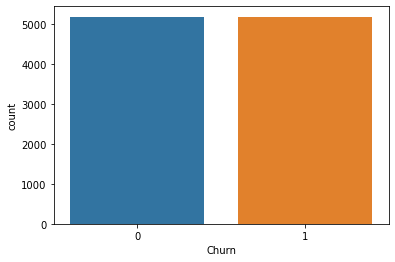

In [271]:
sns.countplot(trainy)

import warnings
warnings.filterwarnings('ignore')

The data is balanced now

In [20]:
#Checking Skewness

In [21]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

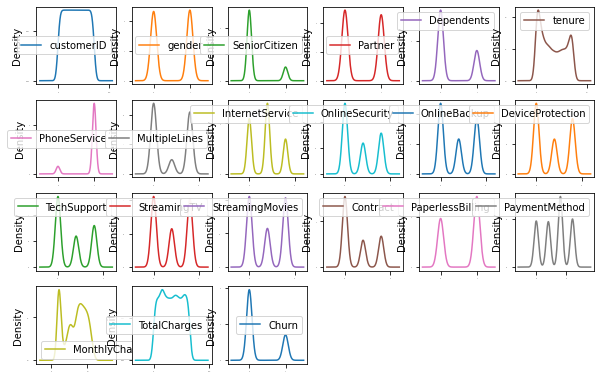

In [22]:
df.plot(kind='density',subplots=True,sharex=False,fontsize=1,figsize=(10,10),layout=(6,6))
plt.show()

In [23]:
x=df.drop(['Churn','customerID'],axis=1)
y=df['Churn']

In [24]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [25]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [272]:
#Correcting Skewness

In [273]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x_new

array([[-0.85059841, -0.39424171,  1.28001944, ...,  0.45401062,
        -1.32938393, -0.27730407],
       [ 1.17564292, -0.39424171, -0.78123813, ...,  1.46663526,
        -0.44119431, -0.87690868],
       [ 1.17564292, -0.39424171, -0.78123813, ...,  1.46663526,
        -0.548124  , -1.93713766],
       ...,
       [ 1.17564292, -0.39424171,  1.28001944, ...,  0.45401062,
         0.95495688,  1.49674399],
       [-0.85059841, -0.39424171, -0.78123813, ...,  0.45401062,
        -0.70707918, -0.83174834],
       [-0.85059841, -0.39424171,  1.28001944, ...,  0.45401062,
         1.33054771, -0.06582121]])

In [274]:
pd.DataFrame(x_new,columns=x.columns).skew().sort_values(ascending=True)

PhoneService       -2.553367
PaperlessBilling   -0.373219
MonthlyCharges     -0.302552
TotalCharges       -0.278463
PaymentMethod      -0.192491
tenure             -0.157734
InternetService    -0.072736
StreamingMovies    -0.012903
StreamingTV        -0.010780
MultipleLines       0.064391
DeviceProtection    0.186985
OnlineBackup        0.211123
gender              0.325092
TechSupport         0.424279
OnlineSecurity      0.454206
Partner             0.498854
Contract            0.775182
Dependents          1.402952
SeniorCitizen       2.142584
dtype: float64

Skewness in the data has been corrected

In [275]:
x=pd.DataFrame(x_new,columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.850598,-0.394242,1.280019,-0.52007,-1.545054,-2.898056,0.394763,-1.291378,-0.813779,1.288883,-0.953465,-0.827583,-1.083609,-1.085034,-0.688730,0.830675,0.454011,-1.329384,-0.277304
1,1.175643,-0.394242,-0.781238,-0.52007,0.546495,0.345059,-1.009937,-1.291378,1.422253,-0.938981,1.276488,-0.827583,-1.083609,-1.085034,1.308314,-1.203840,1.466635,-0.441194,-0.876909
2,1.175643,-0.394242,-0.781238,-0.52007,-1.340916,0.345059,-1.009937,-1.291378,1.422253,1.288883,-0.953465,-0.827583,-1.083609,-1.085034,-0.688730,0.830675,1.466635,-0.548124,-1.937138
3,1.175643,-0.394242,-0.781238,-0.52007,0.848946,-2.898056,0.394763,-1.291378,1.422253,-0.938981,1.276488,1.409513,-1.083609,-1.085034,1.308314,-1.203840,-1.549157,-0.935292,-0.918925
4,-0.850598,-0.394242,-0.781238,-0.52007,-1.340916,0.345059,-1.009937,0.340525,-0.813779,-0.938981,-0.953465,-0.827583,-1.083609,-1.085034,-0.688730,0.830675,0.454011,0.046547,-1.242892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1.175643,-0.394242,-0.781238,-0.52007,-0.933091,-2.898056,-1.009937,-1.291378,-0.813779,-0.938981,-0.953465,1.409513,-1.083609,-1.085034,-0.688730,0.830675,0.454011,-0.716258,-0.685790
10344,-0.850598,-0.394242,-0.781238,-0.52007,0.922242,0.345059,1.130117,0.340525,-0.813779,1.288883,0.626778,-0.827583,1.150764,1.149124,-0.688730,0.830675,-1.549157,1.285838,0.580858
10345,1.175643,-0.394242,1.280019,-0.52007,-1.545054,0.345059,-1.009937,0.340525,0.980529,-0.938981,-0.953465,-0.827583,1.150764,1.149124,-0.688730,0.830675,0.454011,0.954957,1.496744
10346,-0.850598,-0.394242,-0.781238,-0.52007,-1.048198,0.345059,-1.009937,-1.291378,-0.813779,-0.938981,-0.953465,-0.827583,-1.083609,-1.085034,-0.688730,-1.203840,0.454011,-0.707079,-0.831748


In [276]:
#Checking for Outliers

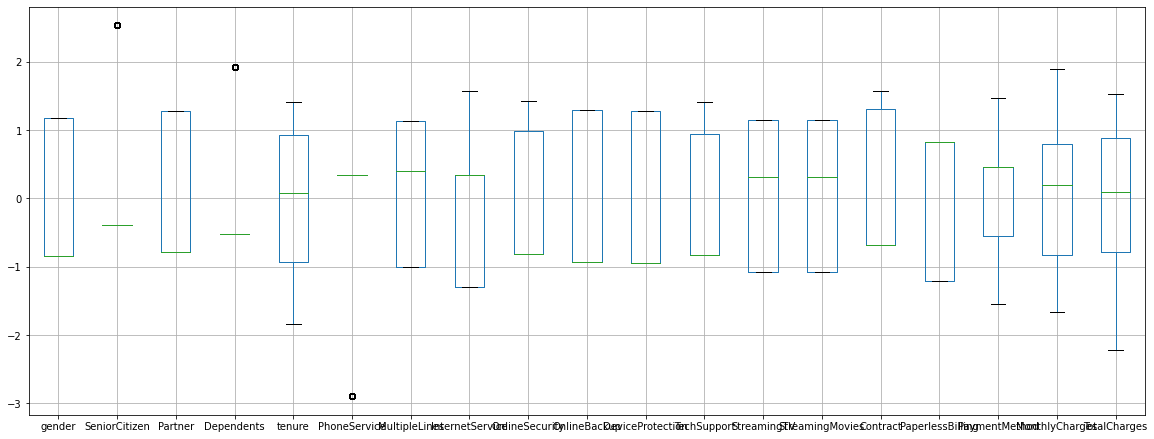

In [277]:
x.boxplot(figsize=[20,9])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [278]:
from scipy.stats import zscore
zscore(df)
z=np.abs(zscore(df))
z

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911890,1.009559,0.439916,1.034530,0.654012,1.277445,3.054010,0.062723,1.183234,0.918838,...,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,0.398558,1.160323,0.398608,0.601023
1,0.216906,0.990532,0.439916,0.966622,0.654012,0.066327,0.327438,0.991588,1.183234,1.407321,...,1.245111,0.925262,1.113495,1.121405,0.371271,1.205113,1.334863,0.259629,0.948762,0.601023
2,0.470701,0.990532,0.439916,0.966622,0.654012,1.236724,0.327438,0.991588,1.183234,1.407321,...,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,1.334863,0.362660,1.641883,1.663829
3,0.990587,0.990532,0.439916,0.966622,0.654012,0.514251,3.054010,0.062723,1.183234,1.407321,...,1.245111,1.396299,1.113495,1.121405,0.371271,1.205113,1.474052,0.746535,0.983710,0.601023
4,1.470632,1.009559,0.439916,0.966622,0.654012,1.236724,0.327438,0.991588,0.172250,0.918838,...,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,0.398558,0.197365,1.235224,1.663829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655145,0.990532,0.439916,1.034530,1.529024,0.340876,0.327438,1.117034,1.183234,1.407321,...,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.879397,0.601023
7039,0.981733,1.009559,0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,0.918838,...,1.245111,0.925262,1.146547,1.138411,0.371271,0.829798,0.537747,1.277533,1.292099,0.601023
7040,0.075745,1.009559,0.439916,1.034530,1.529024,0.870241,3.054010,0.062723,1.183234,1.407321,...,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,0.398558,1.168632,0.139680,0.601023
7041,1.186835,0.990532,2.273159,1.034530,0.654012,1.155283,0.327438,1.117034,0.172250,0.918838,...,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,1.334863,0.320338,0.316534,1.663829


In [279]:
np.abs(zscore(x)<3).all().all()

True

This confirms the non-existence of outliers in the data.

In [280]:
#Checking for Multicollinearity

In [281]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [282]:
def cal_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    return(vif)

In [283]:
cal_vif(x)

,variables,VIF FACTOR
0,gender,1.026594
1,SeniorCitizen,1.092366
2,Partner,1.531824
3,Dependents,1.426976
4,tenure,2.541928
5,PhoneService,1.637991
6,MultipleLines,1.390842
7,InternetService,1.587197
8,OnlineSecurity,1.508751
9,OnlineBackup,1.304222


There is no multicollinearity in the colums.

In [284]:
#Scaling the dataset

In [285]:
from sklearn.preprocessing import StandardScaler 


In [286]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [287]:
for col in x:
    mms=MinMaxScaler()
    x[col]=mms.fit_transform(x[[col]])
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.091783,0.0,0.656385,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.664226,0.095266,0.518122
1,1.0,0.0,0.0,0.0,0.733290,1.0,0.000000,0.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,0.883458,0.0,1.000000,0.344972,0.358455
2,1.0,0.0,0.0,0.0,0.154395,1.0,0.000000,0.000000,1.000000,1.0,0.000000,0.0,0.0,0.0,0.000000,1.0,1.000000,0.314910,0.076129
3,1.0,0.0,0.0,0.0,0.826056,0.0,0.656385,0.000000,1.000000,0.0,1.000000,1.0,0.0,0.0,0.883458,0.0,0.000000,0.206061,0.347266
4,0.0,0.0,0.0,0.0,0.154395,1.0,0.000000,0.570844,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.664226,0.482096,0.260998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1.0,0.0,0.0,0.0,0.279480,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.000000,1.0,0.664226,0.267641,0.409347
10344,0.0,0.0,0.0,0.0,0.848537,1.0,1.000000,0.570844,0.000000,1.0,0.708644,0.0,1.0,1.0,0.000000,1.0,0.000000,0.830511,0.746640
10345,1.0,0.0,1.0,0.0,0.091783,1.0,0.000000,0.570844,0.802452,0.0,0.000000,0.0,1.0,1.0,0.000000,1.0,0.664226,0.737487,0.990529
10346,0.0,0.0,0.0,0.0,0.244176,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.664226,0.270221,0.370480


In [288]:
#Splitting the dataset

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)


In [28]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

pred=lg.predict(x_test)
pred

array([0, 0, 0, ..., 0, 1, 0])

In [29]:
accuracy_score(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1573
           1       0.64      0.54      0.59       540

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



In [30]:
print('mean absolute error:', mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('root mean square:',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error: 0.1949834358731661
mean squared error: 0.1949834358731661
root mean square: 0.4415692877376846


In [41]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

dtr.score(x_train,y_train)
preddtr=dtr.predict(x_test)

print(preddtr)

dtr.score(x_test,y_test)

[0. 0. 0. ... 0. 1. 0.]


-0.3939429584631604

In [42]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)

knr.score(x_train,y_train)
predknr=knr.predict(x_test)

print(predknr)

knr.score(x_test,y_test)

[0.  0.2 0.  ... 0.  0.2 0.4]


0.06009286336559061

Logistic Regressor is the best model for the data becuase it has the highest accuracy score

In [37]:
def churnpredict(c):
    c=c.reshape(1,-1)   
    pred=lg.predict(c)
    print('Predicted value',pred)
    if pred==0:
        print('The customer will leave')
    else :
        print("The customer will stay")

In [38]:
c=np.array([0.0,0.0,1.0,0.0,0.091,0.0,0.65,0.00,0.00,1.0,0.00,0.0,0.0,0.0,0.00,1.0,0.66,0.095,0.51])
churnpredict(c)

Predicted value [0]
The customer will leave


In [43]:
#Saving the best model

In [45]:
import joblib   

joblib.dump(lg,'churnpredictfile.obj')   
lg_from_joblib=joblib.load('churnpredictfile.obj')   
lg_from_joblib.predict(x_test) 

array([0, 0, 0, ..., 0, 1, 0])